# How Trump thrives in 'news deserts'

### Introduction

This is the nerd box for "How Trump thrives in 'news deserts,'" a POLITICO special report published April 8, 2018 — available [here](https://www.politico.com/story/2018/04/08/news-subscriptions-decline-donald-trump-voters-505605). 

Credits: 

*Data analysis*: Shawn Musgrave, POLITICO contributor

*Data editing / factchecking*: Jon McClure, Sarah Frostenson, Lily Mihalik

*Article graphics*: Jeremy Lin


This project started with a question: What role might local newspapers have played in the 2016 presidential elections? Newspapers are just part of the broader media ecosystem in a given county, of course, but analyzing their strength is one way of assessing whether voters had access to quality coverage of policy issues. 

For data on news circulation at the county level, we drew from the [Alliance for Audited Media (AAM)](auditedmedia.com) (formerly called the Audit Bureau of Circulation), an industry group that verifies print and digital circulation for advertisers. As we waded into the AAM database and spoke with other researchers who use it, we knew we faced a couple tough challenges.
    
First, while AAM is the best database available, it has considerable gaps. As we note in the story, not all publications report to AAM, notably small daily papers and weeklies. Every scholar we spoke with noted this is a challenge facing political communications research in the United States. But we found no other database that reports newspaper circulation figures nationwide at the county level, which we needed to run analysis of circulation against election outcomes. Like the top researchers who continue to use AAM, we had to consider how best to account for missing data. (More on that in the below.) One such scholar, Dr. Michelle Ferrier, a professor at Ohio State University, is trying to fill the gaps in AAM data so that future research has a fuller picture of the geography of media access — you can submit missing publications [here](https://goo.gl/forms/2brIERTRTYMePV3q2). Today, Dr. Ferrier's "Media Deserts Project" released a beautiful a fantastic [interactive atlas](https://www.ohio.edu/compass/stories/17-18/04/media-deserts-research-ferrier.cfm) that draws on AAM data and other sources. 

Second, not all publications report to AAM on the same schedule. Some publications report their circulation every year, some every other year, and some fall behind in submitting their figures. Some publications report their Sunday circulation, some report their average weekday circulation, and some report their  figures on a day-by-day basis. This required making calls on how to calculate the number of subscriptions in a given county. Variations in reporting schedule also made it **very** difficult to calculate longitudinal change in total circulation for each county, especially in counties with multiple publications whose reporting periods didn't align. At the recommendation of a media scholar who works with AAM data, we dropped our longitudinal analysis efforts in favor of a "snapshot" approach. 

The challenges didn't end with the AAM data. As with any complex data project on politics, we had to be wary of potential confounding variables. We couldn't just run a correlation between newspaper circulation and Trump's margins and leave it at that. (Although that certainly would have been easier.) To select control variables for a more complex statistical model, we turned to the academic literature, political scientists, and extensive reporting on the socioeconomic and demographic factors that tended to track with Trump's success in particular areas. We ultimately settled on variables reflecting the economic security, ethnic diversity, and education level of the county's residents. In an attempt to get at the urban-rural split, we also included a control for each county's total population.

The several months spent cleaning the AAM data and refining a statistical approach yielded a statistically significant relationship between circulation rate and how well Trump did in a given county — as measured by his margin over Hillary Clinton, as well as how he performed relative to Mitt Romney's margins in 2012. It's a provocative finding, one which piqued the interest of many researchers working in this space. 

# Methodology

### Prepping the AAM data 

*Culling irrelevant publications and counties*

In September 2017, we downloaded circulation data for all active daily and weekly newspapers in the AAM database — approximately 1,000 unique titles. In addition to basic de-duplication of some entries whose names, we also removed "shopper" publications that are primarily coupons or advertisements than editorial products. Some of this cleanup was done using keywords on the publication name — such as excluding publications with "SAVINGS" or "SHOPPER" or "TMC" ([Total Market Coverage](https://en.wikipedia.org/wiki/Total_market_coverage)) in their titles — and some publications were removed on a case-by-case basis. We also removed all circulation data from Alaska, which does not administer elections at the county level.


*Calculating circulation per household figures*

To determine the total circulation figure for each county, we calculated the sum of the highest reported circulation for each publication that delivered to that county. We repeated our analysis using different methods of calculating the county-level circulation, and results were pretty consistent. This method allowed us to capture the maximum contribution of each publication to the county's total circulation figures. We then divided the total circulation by the number of households in the county, per 2015 American Community Survey (ACS) 5-year estimates — table ID S1101: Households and Families. 

*Dealing with missing data*

There were approximately 250 counties in the cleaned AAM data for which there was no circulation data. Rather than treat these as "true-zero" counties, we dropped these counties along with an equal number of counties from the top/right-hand of the circulation distribution. (We tested alternate ways of dealing with these counties with relatively consistent results.) 

*Merging comparison and control variables*

The final database includes the following variables:

- all_pubs_tot_circ_household: The circulation per household figure as calculated above.
- fips: The FIPS county code. 
- tot_households_est: Total number of households in the county (Source: ACS 2015 5-year, S1101: Households and Families)
- pct_uninsured: Percentage of county population without health insurance (Source: ACS 2015 5-year, DP03: SELECTED ECONOMIC CHARACTERISTICS)
- unemployment_rate: Unemployment rate as of November 2016 (Source: Bureau of Labor Statistics)
- pct_white_nonhispanic: Percentage of county population that is white and not Hispanic or Latino (Source: ACS 2015 5-year, B03002: HISPANIC OR LATINO ORIGIN BY RACE)
- any_college_aggregate: Percentage of county population (ages 25 and above) with any education beyond high school (Source, ACS 2015 5-year, B15002: SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER)
- margin_gop_2016: Donald Trump's margin over Hillary Clinton in 2016
- diff_margin_gop_2016_2012: The difference between Trump's margin in 2016 and Mitt Romney's margin over Barack Obama in 2012
- combined_cvap_turnout_2016: The turnout rate, calculated based on Census Voting Age Person, or CVAP (Source: [Catalist](https://catalist.us/))
- diff_cvap_turnout_2016_2012: The difference in CVAP turnout rate between 2012 and 2016 (Source: [Catalist](https://catalist.us/))

In [22]:
import pandas as pd

# import data
trimmed_graphics = pd.read_csv('data/graphics/trimmed_circulation_20180409.csv')

trimmed_graphics.head()

,Unnamed: 0,county_state,all_pubs_tot_circ_household,tot_households_est,diff_margin_gop_2016_2012,diff_cvap_turnout_2016_2012,pct_uninsured,unemployment_rate,pct_white_nonhispanic,any_college_aggregate,fips,fips2,trump_win,margin_gop_2016,margin_gop_2012,combined_cvap_turnout_2016
0,244,MUHLENBERG//KY,0.002340,11539.0,23.435829,1.690555,12.6,5.6,92.382382,35.496166,21177.0,21177.0,1,46.918596,23.482767,53.436458
1,245,FENTRESS//TN,0.003697,7304.0,14.034738,1.935667,15.0,6.0,97.044225,30.483654,47049.0,47049.0,1,67.459992,53.425254,51.611245
2,246,BANKS//GA,0.004273,6553.0,4.523397,5.012509,17.3,4.3,88.372600,32.596418,13011.0,13011.0,1,78.404837,73.881441,51.174879
3,247,APPLING//GA,0.004698,6812.0,8.857740,-0.888646,20.7,5.8,69.636749,33.385259,13001.0,13001.0,1,57.946594,49.088854,52.910262
4,248,ATOKA//OK,0.005135,5258.0,17.412884,2.665194,21.7,6.1,72.242198,40.988221,40005.0,40005.0,1,65.433826,48.020942,47.636887


## Regression analysis

We used both Ordinary Least Squares (OLS) and quantile regression methods for univariate analysis. We also built a multivariate model using the controls indicated above.

In [9]:
# import packages for OLS and Quantile Regression

# OLS + plotting 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Quantile Regression
from statsmodels.regression.quantile_regression import QuantReg
quantiles = np.arange(.05, .96, .1)


# define OLS function (includes plot settings)
def run_ols(data, dep_var, ind_var, c_var):
    lm = smf.ols(formula=str(dep_var) + "~" + str(ind_var), data=data).fit()
    
    print(lm.summary())
    
    # create a DataFrame with the minimum and maximum values of ind_var
    X_new = pd.DataFrame({ind_var: [data[ind_var].min(), data[ind_var].max()]})
    X_new.head()

    # make predictions for those x values and store them
    preds = lm.predict(X_new)
    #print(preds)
    

    # first, plot the observed data
    fig, ax = fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(data[ind_var], data[dep_var], alpha=.7, s=2, \
               c=data[c_var], cmap='seismic')
    ax.set_xlim((0, data[ind_var].max()+0.2))
    ax.set_ylim(((data[dep_var].min()-(0.1*data[dep_var].min())), \
                 (data[dep_var].max()+(0.1*data[dep_var].max()))))
    legend = ax.legend()
    ax.set_xlabel(ind_var, fontsize=16)
    ax.set_ylabel(dep_var, fontsize=16);

    # then, plot the least squares line
    plt.plot(X_new, preds, c='green', linewidth=1)

    
# define Quantile Regression function (including plot settings)

# dep_var: dependent variable
# ind_var: independent variable
# c_var: color variable (for scatter plot)

def run_quantile(data, dep_var, ind_var, c_var):
    mod = smf.quantreg(str(dep_var) + '~' + str(ind_var), data)
    res = mod.fit(q=.5)
    print(res.summary())

    def fit_model(q):
        res = mod.fit(q=q)
        return [q, res.params['Intercept'], res.params[ind_var]] + \
                res.conf_int().ix[ind_var].tolist()

    models = [fit_model(x) for x in quantiles]
    models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

    ols = smf.ols(str(dep_var) + '~' + str(ind_var), data).fit()
    ols_ci = ols.conf_int().ix[ind_var].tolist()
    ols = dict(a = ols.params['Intercept'],
               b = ols.params[ind_var],
               lb = ols_ci[0],
               ub = ols_ci[1])

    print(models)
    print(ols)

    x = np.arange(data[ind_var].min(), data[ind_var].max(), 0.1)
    get_y = lambda a, b: a + b * x

    fig, ax = plt.subplots(figsize=(8, 5))

    for i in range(models.shape[0]):
        y = get_y(models.a[i], models.b[i])
        ax.plot(x, y, linestyle='dotted', color='grey')

    y = get_y(ols['a'], ols['b'])

    ax.plot(x, y, color='springgreen', label='Ordinary Least Squares')
    ax.scatter(data[ind_var], data[dep_var], alpha=.7, s=2, \
               c=data[c_var], cmap='seismic')
    ax.set_xlim((0, data[ind_var].max()+0.2))
    ax.set_ylim(((data[dep_var].min()-(0.1*data[dep_var].min())), \
                 (data[dep_var].max()+(0.1*data[dep_var].max()))))
    legend = ax.legend()
    ax.set_xlabel(ind_var, fontsize=16)
    ax.set_ylabel(dep_var, fontsize=16);



## Trump's margin and circulation rates

### Univariate regression model

Regressing Trump's margin against circulation rate yields a statistically significant and negative correlation, both in straight OLS and in the quantile regression functions. 

Under the univariate model, then, for every 1 in 10 (0.1) households that subscribes to a paper, Trump's margin decreases by 6.4 percentage points (OLS) or 7.7 percentage points (quantile). Dot color in the scatter plots corresponds to the 2016 GOP margin in each county — on a scale of dark red for strongly GOP to dark blue for strongly DNC margin.

Circulation rates alone obviously don't explain the 2016 election rates — one strong hint is the low R-squared value in the univariate models. Accordingly, we didn't report the univariate coefficient.

                            OLS Regression Results                            
Dep. Variable:        margin_gop_2016   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     171.3
Date:                Mon, 09 Apr 2018   Prob (F-statistic):           5.82e-38
Time:                        14:11:53   Log-Likelihood:                -12562.
No. Observations:                2624   AIC:                         2.513e+04
Df Residuals:                    2622   BIC:                         2.514e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

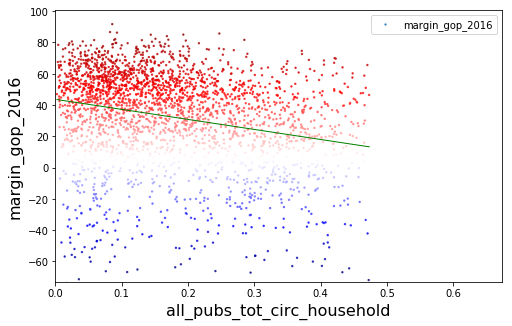

                         QuantReg Regression Results                          
Dep. Variable:        margin_gop_2016   Pseudo R-squared:              0.05307
Model:                       QuantReg   Bandwidth:                       9.159
Method:                 Least Squares   Sparsity:                        61.77
Date:                Mon, 09 Apr 2018   No. Observations:                 2624
Time:                        14:11:54   Df Residuals:                     2622
                                        Df Model:                            1
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      52.1013      1.105     47.161      0.000      49.935      54.268
all_pubs_tot_circ_household   -77.7555      5.212    -14.919      0.000     -87.975     -67.536
      q          a          b          lb         ub
0  0.05 -2

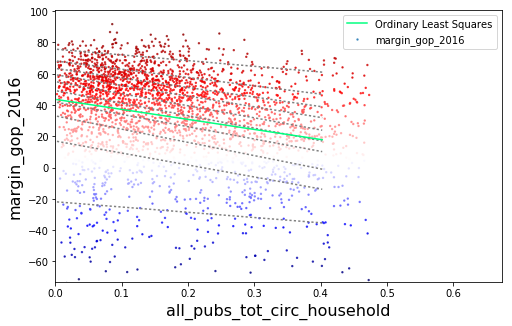

In [15]:
data = trimmed_graphics

run_ols(data, 'margin_gop_2016', 'all_pubs_tot_circ_household', 'margin_gop_2016')

plt.show()

run_quantile(data, 'margin_gop_2016', 'all_pubs_tot_circ_household', 'margin_gop_2016')

### Multivariate regression model

We settled on the control variables for our multivariate model after much research as to which socioeconomic, demographic, and electoral features to include, plus a fair amount of tinkering. 

In running our multivariate analysis, we faced the issue that one variable — Romney's margin in 2012 — had a **much** stronger correlation to Trump's margin in 2016 than most other controls. We thus chose to run our analysis two ways, once with the 2012 margin and once without the 2012 margin. 

Our coefficients in the multivariate models were, as expected, lower than in the univariate models: -5.4 (with the 2012 GOP margin) and -14.6 (without the 2012 GOP margin). We reported the smaller and conservative figure, which also had the highest R-squared value: for every additional 1 in 10 households that subscribed to a news outlet in the AAM data, Trump’s vote share by an average of 0.5 percentage points.

                            OLS Regression Results                            
Dep. Variable:        margin_gop_2016   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 2.057e+04
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:32:50   Log-Likelihood:                -9784.6
No. Observations:                2624   AIC:                         1.957e+04
Df Residuals:                    2622   BIC:                         1.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.4964      0.244     

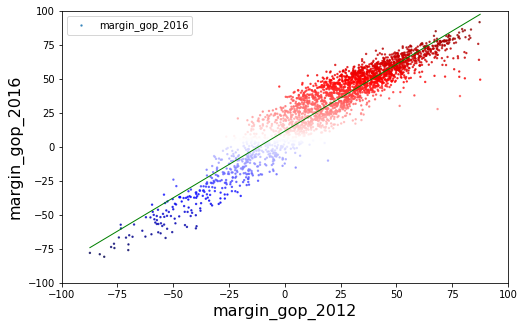

In [32]:
# The 2012 GOP margin is very, very closely correlated with the 2016 GOP margin. 

data = trimmed_graphics
    
dep_var = 'margin_gop_2016'
ind_var = 'margin_gop_2012'
c_var = 'margin_gop_2016'
lm = smf.ols(formula=str(dep_var) + "~" + str(ind_var), data=data).fit()

print(lm.summary())

# create a DataFrame with the minimum and maximum values of ind_var
X_new = pd.DataFrame({ind_var: [data[ind_var].min(), data[ind_var].max()]})
X_new.head()

# make predictions for those x values and store them
preds = lm.predict(X_new)
#print(preds)

# plot the observed data and least-squares line
fig, ax = fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(data[ind_var], data[dep_var], alpha=.7, s=2, c=data[c_var], cmap='seismic')
ax.set_xlim((-100, 100))
ax.set_ylim((-100,100))
legend = ax.legend()
ax.set_xlabel(ind_var, fontsize=16)
ax.set_ylabel(dep_var, fontsize=16);
plt.plot(X_new, preds, c='green', linewidth=1)
plt.show()


In [46]:
# Multivariate model with the 2012 GOP margins

data = trimmed_graphics

lm = smf.ols(formula='margin_gop_2016 ~ ' \
             + '+ margin_gop_2012'  \
             + '+ combined_cvap_turnout_2016' \
             + '+ pct_uninsured + unemployment_rate' \
             + '+ pct_white_nonhispanic'\
             + '+ tot_households_est' \
             + '+ any_college_aggregate' \
             + '+ all_pubs_tot_circ_household', data=data).fit()

# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        margin_gop_2016   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     6877.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:04:04   Log-Likelihood:                -8587.1
No. Observations:                2624   AIC:                         1.719e+04
Df Residuals:                    2615   BIC:                         1.725e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [45]:
# ... and multivariate model WITHOUT the 2012 GOP margins

data = trimmed_graphics

lm = smf.ols(formula='margin_gop_2016 ~ ' \
             #+ '+ margin_gop_2012'  
             + '+ combined_cvap_turnout_2016' \
             + '+ pct_uninsured + unemployment_rate' \
             + '+ pct_white_nonhispanic'\
             + '+ tot_households_est' \
             + '+ any_college_aggregate' \
             + '+ all_pubs_tot_circ_household', data=data).fit()

# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        margin_gop_2016   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     510.4
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:04:00   Log-Likelihood:                -11515.
No. Observations:                2624   AIC:                         2.305e+04
Df Residuals:                    2616   BIC:                         2.309e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### Relative ratios

We also calculated relative ratios to assess how counties with relatively high and low circulation rates — namely, the top and bottom decile — differed from each other. 

In [33]:
#  derive the top and bottom deciles 
bottom_tenth_circulation = np.percentile(trimmed_graphics['all_pubs_tot_circ_household'], 10)
top_tenth_circulation = np.percentile(trimmed_graphics['all_pubs_tot_circ_household'], 90)


# ... then grab the counties with the lowest circulation and the counties with highest circulation
low_circ = trimmed_graphics[\
                    (trimmed_graphics['all_pubs_tot_circ_household']<bottom_tenth_circulation)] 

high_circ = trimmed_graphics[\
                    (trimmed_graphics['all_pubs_tot_circ_household']>top_tenth_circulation)] 



**FINDING**: Counties in the top 10% by circulation rate were about twice as likely to go for Clinton than counties in the lowest 10%.

In [34]:
# calculate percentage of high_circ and low_circ counties voted for Clinton
high_circ_hrc = len(high_circ[high_circ['margin_gop_2016']<0])/float(len(high_circ))
low_circ_hrc = len(low_circ[low_circ['margin_gop_2016']<0])/float(len(high_circ))

# relative ratio
high_circ_hrc / low_circ_hrc

1.842105263157895

In [35]:
# calculate relative percentage of low_circ and high_circ counties voted for Trump 

high_circ_trump = len(high_circ[high_circ['margin_gop_2016']>0])/float(len(high_circ))
low_circ_trump = len(low_circ[low_circ['margin_gop_2016']>0])/float(len(high_circ))

# calculate relative ratio
low_circ_trump / high_circ_trump

1.1658031088082903

**FINDING**: Counties in the top 10% by circulation rate were about 3.7 times as likely to shift blue than counties in the lowest 10%.

In [36]:
high_circ_shift_dnc = len(high_circ[high_circ['diff_margin_gop_2016_2012']<0])/float(len(high_circ))
low_circ_shift_dnc = len(low_circ[low_circ['diff_margin_gop_2016_2012']<0])/float(len(high_circ))

# calculate relative ratio
high_circ_shift_dnc/low_circ_shift_dnc

3.7222222222222223

**FINDING**: In counties where Trump’s vote margin was greater than Romney’s in 2012, the average circulation rate was only about two-thirds the size of counties where Trump did worse than Romney.

In [41]:
# calculate the mean circulation for counties in which Trump gained over Romney's margin in 2012
mean_trump_shift = trimmed_graphics[trimmed_graphics['diff_margin_gop_2016_2012']>0]['all_pubs_tot_circ_household'].mean()

# ... and where Trump underperformed Romney's margin in 2012
mean_hrc_shift = trimmed_graphics[trimmed_graphics['diff_margin_gop_2016_2012']<0]['all_pubs_tot_circ_household'].mean()

# relative circulation rates
mean_trump_shift / mean_hrc_shift

0.65931118247664988

In [47]:
# taking out Catalist 

# Multivariate model with the 2012 GOP margins

data = trimmed_graphics

lm = smf.ols(formula='margin_gop_2016 ~ ' \
             + '+ margin_gop_2012'  \
             #+ '+ combined_cvap_turnout_2016' \
             + '+ pct_uninsured + unemployment_rate' \
             + '+ pct_white_nonhispanic'\
             + '+ tot_households_est' \
             + '+ any_college_aggregate' \
             + '+ all_pubs_tot_circ_household', data=data).fit()

# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        margin_gop_2016   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     7835.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:04:30   Log-Likelihood:                -8591.4
No. Observations:                2624   AIC:                         1.720e+04
Df Residuals:                    2616   BIC:                         1.725e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [48]:
# taking out Catalist 

# Multivariate model without the 2012 GOP margins

data = trimmed_graphics

lm = smf.ols(formula='margin_gop_2016 ~ ' \
             #+ '+ margin_gop_2012'  \
             #+ '+ combined_cvap_turnout_2016' \
             + '+ pct_uninsured + unemployment_rate' \
             + '+ pct_white_nonhispanic'\
             + '+ tot_households_est' \
             + '+ any_college_aggregate' \
             + '+ all_pubs_tot_circ_household', data=data).fit()

# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        margin_gop_2016   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     559.4
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:04:52   Log-Likelihood:                -11562.
No. Observations:                2624   AIC:                         2.314e+04
Df Residuals:                    2617   BIC:                         2.318e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         